|Challenge Set |**4 **                                          |
|-------------:|:-----------------------------------------------|
|Topic:        |Linear Regression and Learning Curve challenges |
|Date:         |07/24/2016                                      | 
|Name:         |Bryant Biggs                                    |
|Worked with:  |N/A                                             |
---
# WRITTEN FOR PYTHON 3
### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)
---

In [225]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
import pandas as pd
import numpy as np
import sys

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from patsy import dmatrices
import statsmodels.api as sm

# default plot stying changes
import seaborn as sns
sns.set_style("white")
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_palette("Set2")
colors = sns.color_palette('Set2',12)

# <a id='1'></a>Challenge 1:
Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

    quadratic (second degree polynomial)
    logarithmic (log(x))

(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
# generate fake data
points = 200
epsilon = sys.float_info.epsilon * np.random.rand(points)

B0 = 1
B1 = 5

# make dataframe
data_dict = {'x':np.random.rand(points)*10}
df = pd.DataFrame.from_records(data_dict)
df['y'] = B0 + B1 * np.log(df['x']) + epsilon

In [3]:
X = df[['x']]
y = df['y']

# linear regression model
lrm = LinearRegression()
mdl = lrm.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [4]:
# model intercept and coefficients
print('Intercept: {0}'.format(mdl.intercept_))
print('Coeficient: {0}'.format(mdl.coef_))

Intercept: 0.06905105718207416
Coeficient: [ 1.49816193]


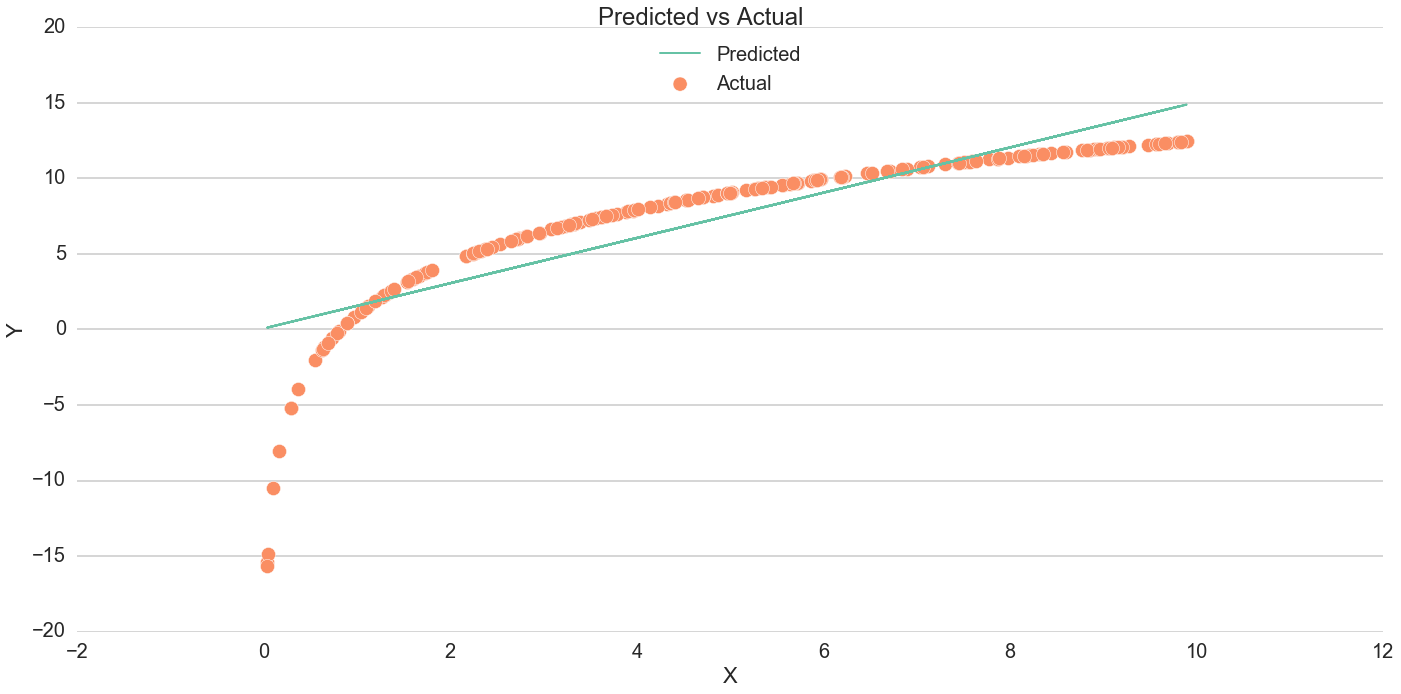

In [5]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(X, mdl.predict(X), color=colors[0], linewidth=2.0, label='Predicted')
#ax.scatter(X, mdl.predict(X), s=100, c=colors[0], alpha=1, label='Predicted', edgecolor='w')
ax.scatter(X, y, s=200, c=colors[1], alpha=1, label='Actual', edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('Predicted vs Actual')
plt.xlabel('X')
plt.ylabel('Y')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

In [6]:
df['x_sqr'] = df['x']**2
X_a = df[['x_sqr']]
y_a = df['y']

# linear regression model
mdl_a = lrm.fit(X_a,y_a)

In [7]:
# model intercept and coefficients
print('Intercept: {0}'.format(mdl_a.intercept_))
print('Coeficient: {0}'.format(mdl_a.coef_))

Intercept: 3.465613689437983
Coeficient: [ 0.12225205]


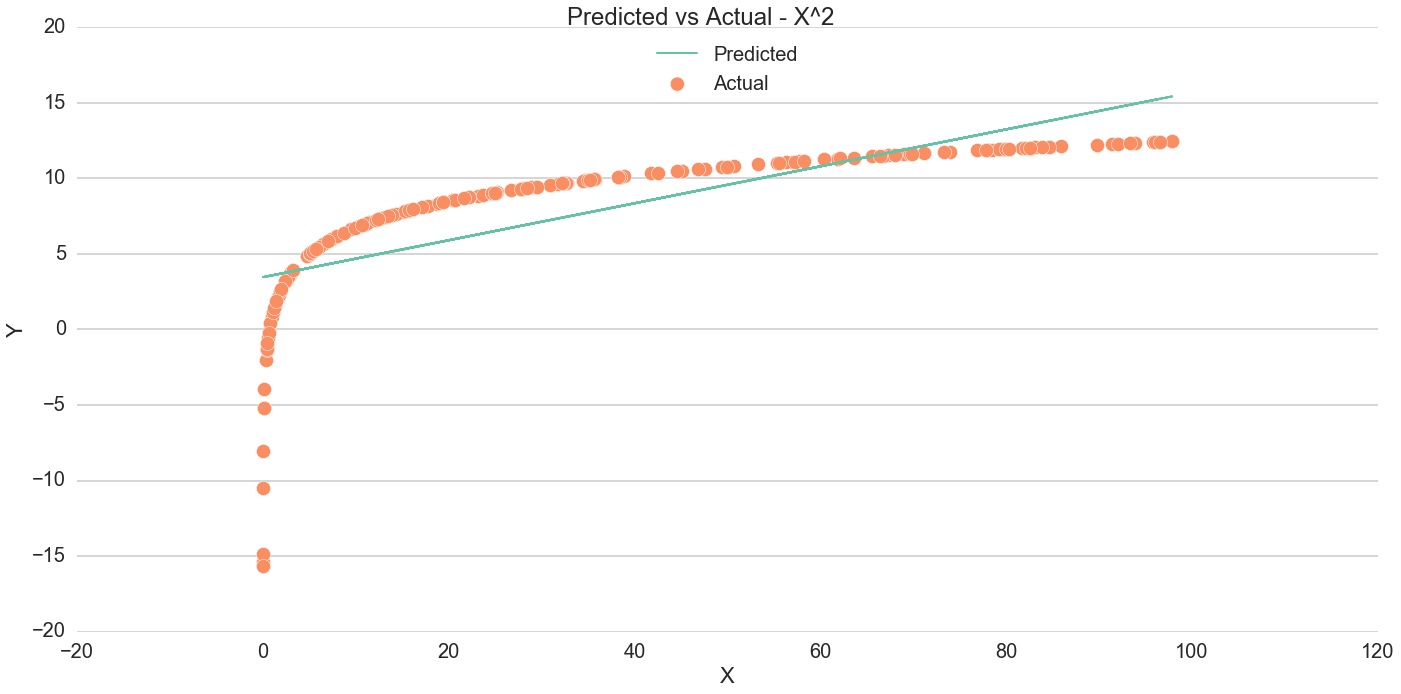

In [8]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(X_a, mdl_a.predict(X_a), color=colors[0], linewidth=2.0, label='Predicted')
#ax.scatter(X_a, mdl_a.predict(X_a), s=100, c=colors[0], alpha=1, label='Predicted', edgecolor='w')
ax.scatter(X_a, y_a, s=200, c=colors[1], alpha=1, label='Actual', edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('Predicted vs Actual - X^2')
plt.xlabel('X')
plt.ylabel('Y')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

In [9]:
df['x_log'] = np.log(df['x'])
X_b = df[['x_log']]
y_b = df['y']

# linear regression model
mdl_b = lrm.fit(X_b,y_b)

In [10]:
# model intercept and coefficients
print('Intercept: {0}'.format(mdl_b.intercept_))
print('Coeficient: {0}'.format(mdl_b.coef_))

Intercept: 1.0000000000000027
Coeficient: [ 5.]


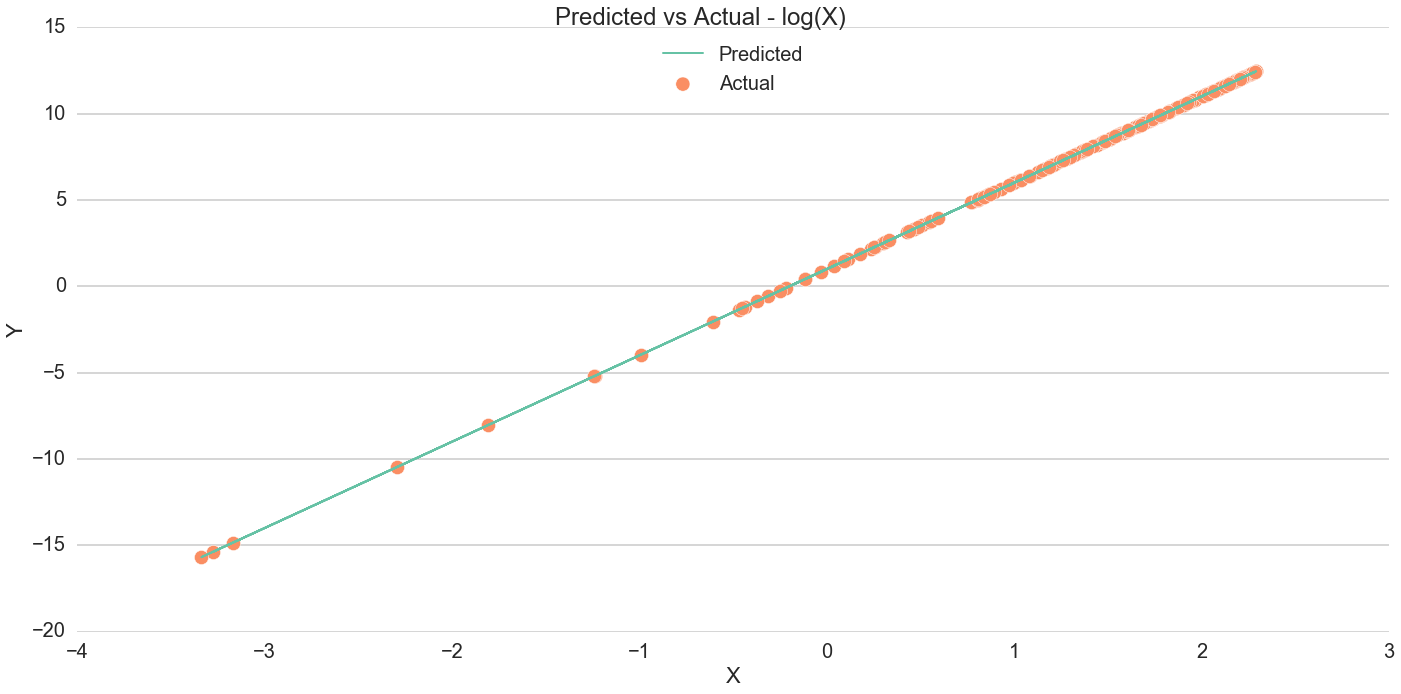

In [11]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(X_b, mdl_b.predict(X_b), color=colors[0], linewidth=2.0, label='Predicted')
#ax.scatter(X_b, mdl_b.predict(X_b), s=400, c=colors[0], alpha=1, label='Predicted', edgecolor='w')
ax.scatter(X_b, y_b, s=200, c=colors[1], alpha=1, label='Actual', edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('Predicted vs Actual - log(X)')
plt.xlabel('X')
plt.ylabel('Y')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 1 is:
* What does it predict?

<font color='blue'>The charts shown above.</font>

___

# <a id='2'></a>Challenge 2:
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [12]:
# generate fake data
points = 200
epsilon = sys.float_info.epsilon * np.random.rand(points)

B0 = 1
B1 = 5
B2 = 8

# make dataframe
data_dict_2 = {'x':np.random.rand(points)*10}
df_2 = pd.DataFrame.from_records(data_dict_2)
df_2['x_sqr'] = df_2['x']**2
df_2['y'] = B0 + B1*df_2['x'] + B2*df_2['x_sqr'] + epsilon

In [13]:
# split data set 80/20 train/test
X_2 = df_2[['x']]
y_2 = df_2['y']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.20, random_state=4444)

In [14]:
# linear regression model
lrm_2 = LinearRegression()
mdl_2 = lrm_2.fit(X_train,y_train)

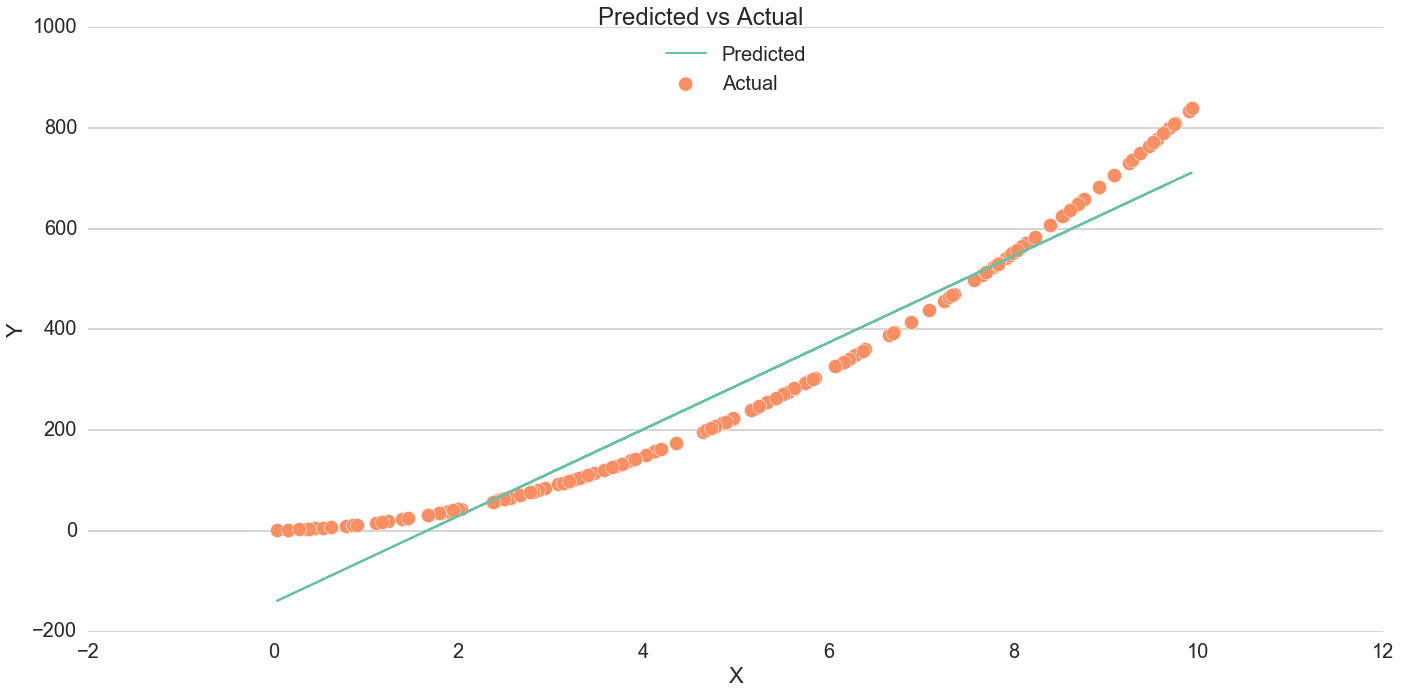

In [15]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(X_train, mdl_2.predict(X_train), color=colors[0], linewidth=2.0, label='Predicted')
#ax.scatter(X_b, mdl_b.predict(X_b), s=400, c=colors[0], alpha=1, label='Predicted', edgecolor='w')
ax.scatter(X_train, y_train, s=200, c=colors[1], alpha=1, label='Actual', edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('Predicted vs Actual')
plt.xlabel('X')
plt.ylabel('Y')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

In [16]:
# model intercept and coefficients
print('Training Mean Squared Error: {0}'.format(mean_squared_error(y_train, mdl_2.predict(X_train))))
print('Testing Mean Squared Error: {0}'.format(mean_squared_error(y_test, mdl_2.predict(X_test))))

Training Mean Squared Error: 3226.7264367452976
Testing Mean Squared Error: 3507.1613719341667


## Answer for Challenge 2 is:

<font color='blue'>Shown directly above (one cell up)</font><br>

___

# <a id='3'></a>Challenge 3:
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

    training error
    test error
    R squared
    AIC

In [2]:
df = df[['x', 'y']]
# generate fake data
points = 200
epsilon = sys.float_info.epsilon * np.random.rand(points)

B0 = 1
B1 = 5

X = df[['x']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4444)

In [269]:
# linear regression model
for i in range(2,8):
    poly = PolynomialFeatures(i)
    poly.fit_transform(X_train)
    lrm = LinearRegression()
    mdl = lrm.fit(X_train,y_train)
    print(mdl.coef_)

[ 1.45930363]
[ 1.45930363]
[ 1.45930363]
[ 1.45930363]
[ 1.45930363]
[ 1.45930363]


In [267]:
mdl.coef_

array([ 1.45930363])

In [264]:

# fit different polynomials and plot approximations
for degree in [0, 1, 3, 9]:
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])


In [257]:
# generate results
train_err, test_err = [], []
R2, AIC = [], []

#for i in range(8):
    #model = Pipeline([('poly', PolynomialFeatures(degree=i)), ('linear', LinearRegression(fit_intercept=False))])
for degree in [0, 1, 3, 9]):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    
    '''
    #model = model.fit(X_train, y_train)
    mdl = model.fit(X_train[:, np.newaxis], y_train)

    # sklearn linear regression model
    lrm = LinearRegression()
    mdl = lrm.fit(X_train, y_train)

    # mean squared errors
    test_err.append(mean_squared_error(y_test, mdl.predict(X_test)))
    
    # statsmodel OLS for r-squared and AIC values
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    R2.append(results.rsquared)
    AIC.append(results.aic)
    '''

SyntaxError: invalid syntax (<ipython-input-257-b7252a01ddb1>, line 7)

ValueError: x and y must have same first dimension

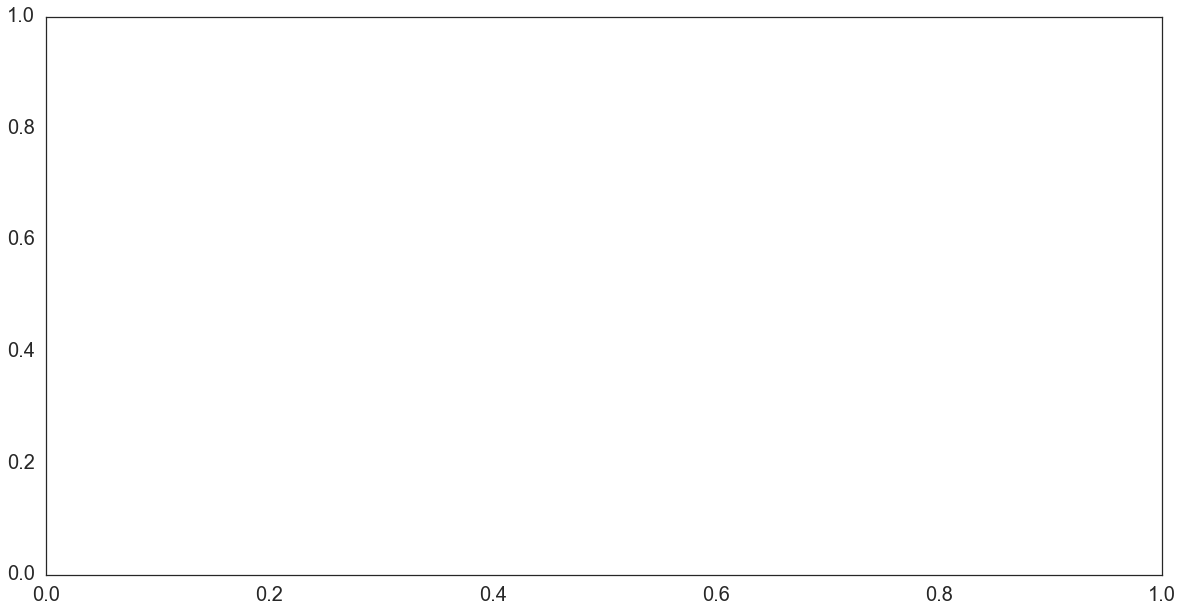

In [243]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(range(8), train_err, color=colors[0], linewidth=2.0)
ax.scatter(range(8), train_err, s=200, c=colors[0], alpha=1, edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('Training Error')
plt.xlabel('Polynomial')
plt.ylabel('MSE')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


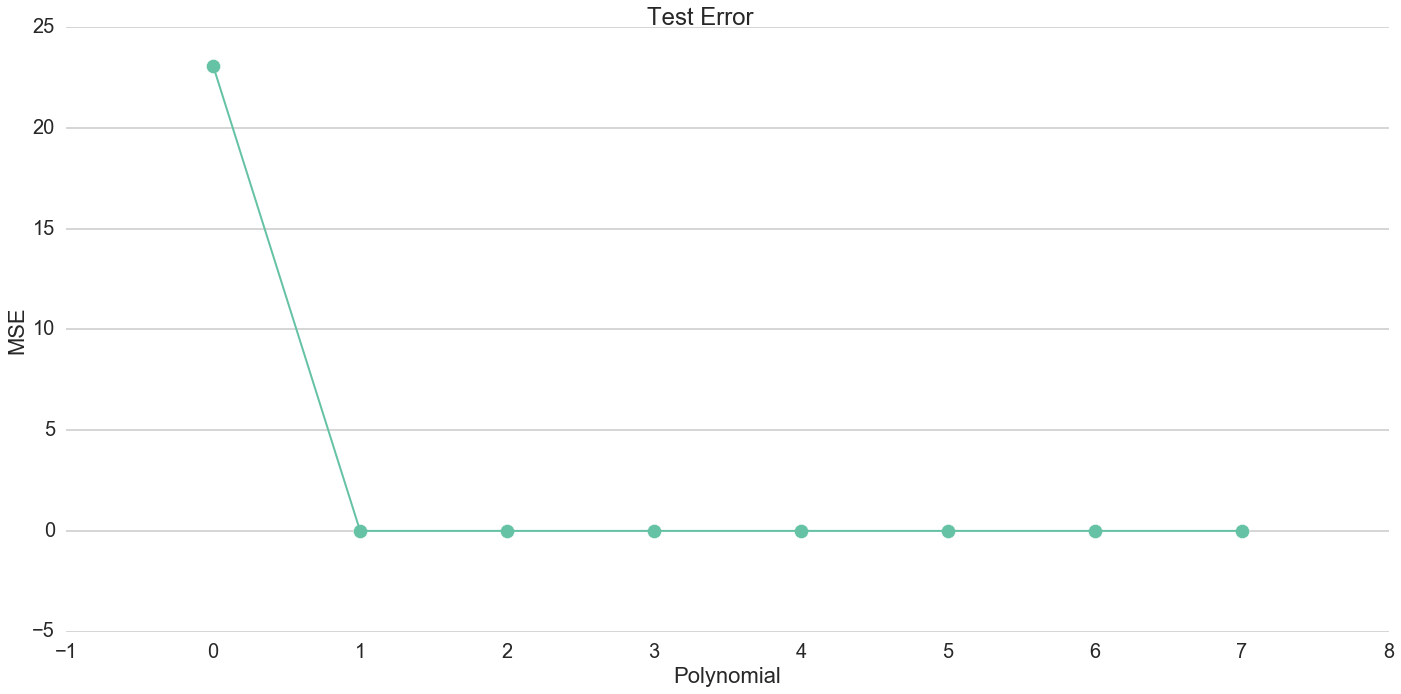

In [205]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(range(8), test_err, color=colors[0], linewidth=2.0)
ax.scatter(range(8), test_err, s=200, c=colors[0], alpha=1, edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('Test Error')
plt.xlabel('Polynomial')
plt.ylabel('MSE')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


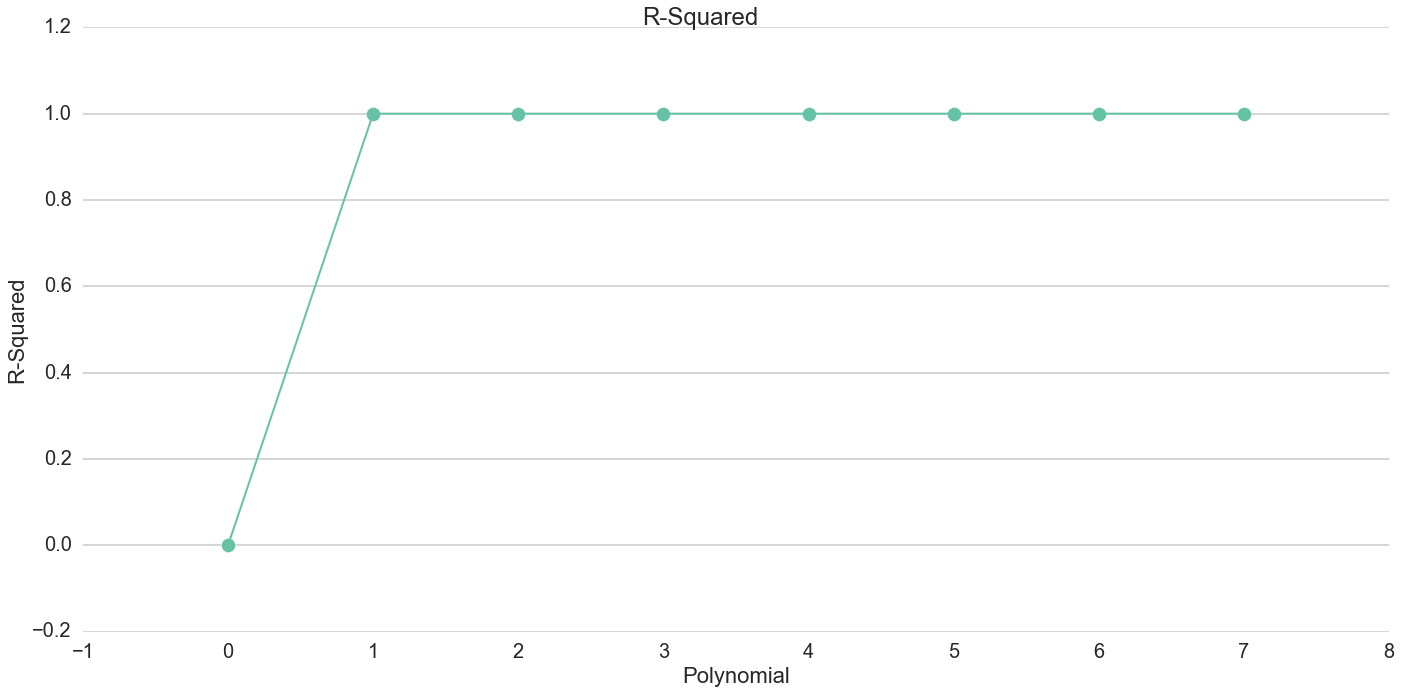

In [206]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(range(8), R2, color=colors[0], linewidth=2.0)
ax.scatter(range(8), R2, s=200, c=colors[0], alpha=1, edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('R-Squared')
plt.xlabel('Polynomial')
plt.ylabel('R-Squared')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


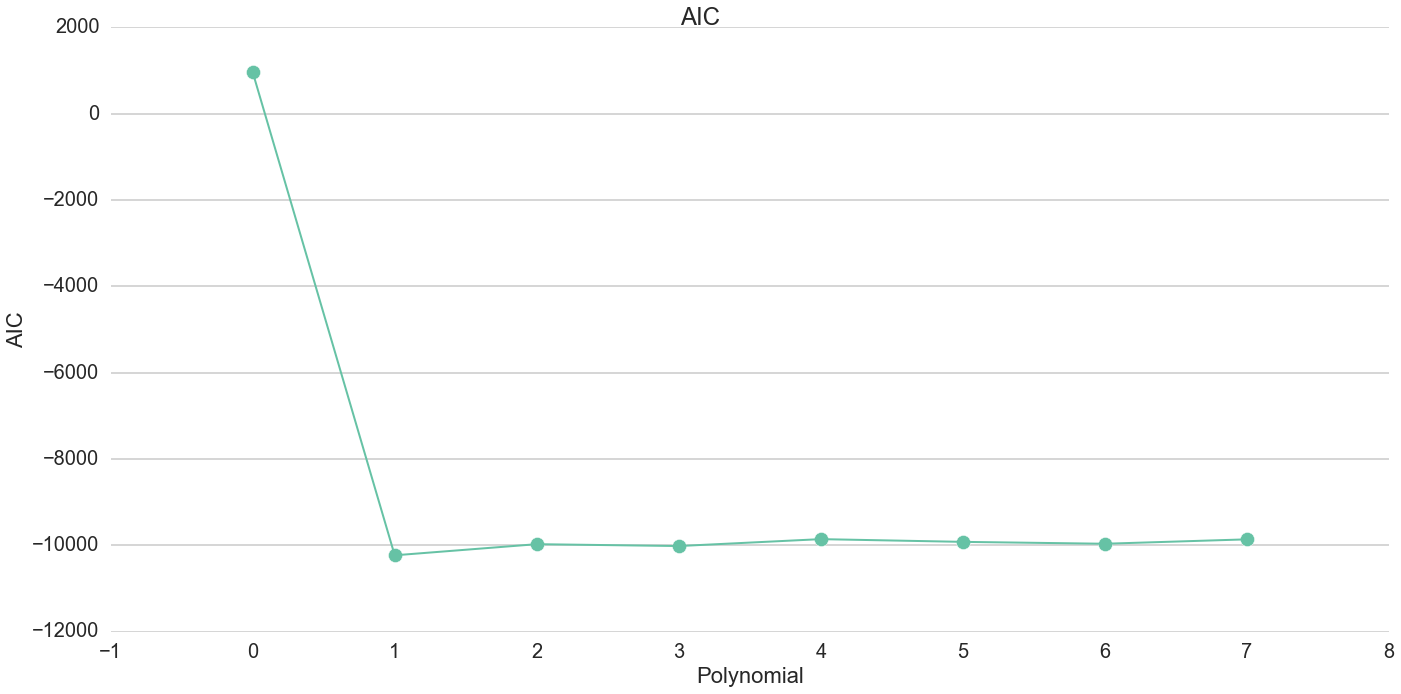

In [207]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(range(8), AIC, color=colors[0], linewidth=2.0)
ax.scatter(range(8), AIC, s=200, c=colors[0], alpha=1, edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('AIC')
plt.xlabel('Polynomial')
plt.ylabel('AIC')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 3 is:

<font color='blue'>Charts shown above (Although they do not look correct to me).</font>

___

# <a id='4'></a>Challenge 4:
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

## Answer for Challenge 4 is:

<font color='blue'>Charts and information shown above</font>
___

In [202]:
# generate results
train_err, test_err = [], []
R2, AIC = [], []

features = ['x0','x1','x2','x3','x4','x5','x6','x7']
for i in range(len(features)):
    X = df[features[0:i+1]]
    y = df['y']
    
    # split between train and test 80/20
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4444)
    
    # sklearn linear regression model
    lrm = LinearRegression()
    mdl = lrm.fit(X_train, y_train)

    # mean squared erros
    train_err.append(mean_squared_error(y_train, mdl.predict(X_train)))
    test_err.append(mean_squared_error(y_test, mdl.predict(X_test)))
    
    # statsmodel OLS for r-squared and AIC values
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    R2.append(results.rsquared)
    AIC.append(results.aic)